In [1]:
import numpy as np 
import pandas as pd
import networkx as nx

In [2]:
df = pd.read_csv('amapa.csv', index_col=None)
df

,origem,destinho,distancia KM,distancia M
0,Macapá,Santana,23,23000
1,Macapá,Cutias,139,139000
2,Macapá,Itaubal,102,102000
3,Macapá,Porto Grande,112,112000
4,Macapá,Mazagão,36,36000
5,Santana,Mazagão,25,25000
6,Santana,Laranjal do Jari,279,279000
7,Porto Grande,Ferreira Gomes,37,37000
8,Porto Grande,Pedra Branca do Amapari,75,75000
9,Pedra Branca do Amapari,Serra do Navio,21,21000


In [3]:
ap = nx.from_pandas_edgelist(df, source='origem', target='destinho', edge_attr='distancia M')

In [4]:
ap.nodes()

NodeView(('Macapá', 'Santana', 'Cutias', 'Itaubal', 'Porto Grande', 'Mazagão', 'Laranjal do Jari', 'Ferreira Gomes', 'Pedra Branca do Amapari', 'Serra do Navio', 'Tartarugalzinho', 'Amapá', 'Pracuuba', 'Calçoene', 'Oiapoque'))

In [5]:
ap.edges()

EdgeView([('Macapá', 'Santana'), ('Macapá', 'Cutias'), ('Macapá', 'Itaubal'), ('Macapá', 'Porto Grande'), ('Macapá', 'Mazagão'), ('Santana', 'Mazagão'), ('Santana', 'Laranjal do Jari'), ('Porto Grande', 'Ferreira Gomes'), ('Porto Grande', 'Pedra Branca do Amapari'), ('Ferreira Gomes', 'Tartarugalzinho'), ('Pedra Branca do Amapari', 'Serra do Navio'), ('Tartarugalzinho', 'Amapá'), ('Tartarugalzinho', 'Pracuuba'), ('Amapá', 'Calçoene'), ('Calçoene', 'Oiapoque')])

In [6]:
ap.order()

15

In [7]:
# cidades que possuem mais de um caminho
for x in ap.nodes():
    if ap.degree(x) > 2:
       print(x)

Macapá
Santana
Porto Grande
Tartarugalzinho


In [8]:
djk2 = nx.dijkstra_path(ap, source='Macapá', target='Oiapoque', weight=True)
djk2

['Macapá',
 'Porto Grande',
 'Ferreira Gomes',
 'Tartarugalzinho',
 'Amapá',
 'Calçoene',
 'Oiapoque']

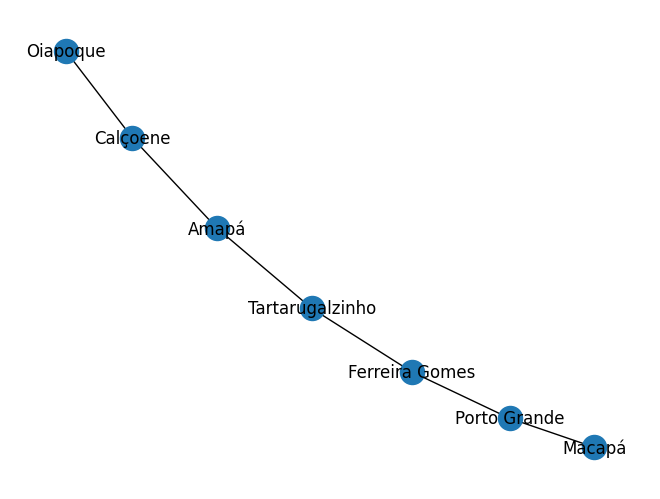

In [10]:
rota1 = ap.subgraph(['Macapá','Porto Grande','Ferreira Gomes','Tartarugalzinho','Amapá','Calçoene','Oiapoque'])
nx.draw(rota1, with_labels=True)